In [ ]:
'''
Install the following libraries: `requests`, `matplotlib`.
Use `requests` to track the location of the International Space Station. Generate at least 100 data points with the latitude, longitude, and timestamp of the data point. You may do this by pinging this  API once every 10 seconds for 17 or so minutes.
Use `matplotlib` to illustrate the path of the ISS. Use any visualization you feel is appropriate.
'''

0 Longitude: 106.79525652272, Latitude: -50.905721719304, Timestamp: 1751693524
1 Longitude: 107.94825191867, Latitude: -51.049795954731, Timestamp: 1751693536
2 Longitude: 109.10839566372, Latitude: -51.18142566858, Timestamp: 1751693548
3 Longitude: 110.27511508731, Latitude: -51.300483174955, Timestamp: 1751693560
4 Longitude: 111.34986090505, Latitude: -51.398473386051, Timestamp: 1751693571
5 Longitude: 112.52746343517, Latitude: -51.493113683968, Timestamp: 1751693583
6 Longitude: 113.70980792622, Latitude: -51.574869772974, Timestamp: 1751693595
7 Longitude: 114.89622282697, Latitude: -51.643658015054, Timestamp: 1751693607
8 Longitude: 115.98676929219, Latitude: -51.695261776278, Timestamp: 1751693618
9 Longitude: 117.17906907205, Latitude: -51.739008776298, Timestamp: 1751693630
10 Longitude: 118.37341505278, Latitude: -51.769618484734, Timestamp: 1751693642
11 Longitude: 119.56908619081, Latitude: -51.787058651546, Timestamp: 1751693654
12 Longitude: 121.06443546467, Latitude

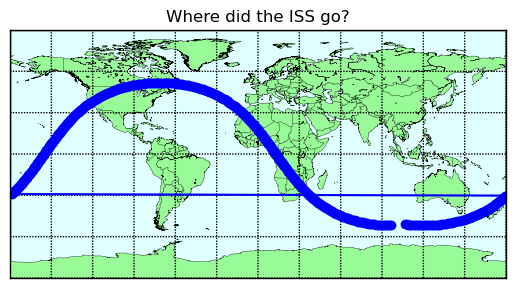

In [7]:
import requests
import matplotlib.pyplot as plt
import time
import numpy as np
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='l')

map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='#98FB98',lake_color='#E0FFFF')
map.drawmapboundary(fill_color='#E0FFFF')
map.drawmeridians(np.arange(-180, 180, 30))
map.drawparallels(np.arange(-90, 90, 30))

l_longitude = []
l_latitude = []

for i in range(0, 500):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    ISS_data = response.json()
    longitude = ISS_data["longitude"]
    latitude = ISS_data["latitude"]
    l_longitude.append(longitude)
    l_latitude.append(latitude)
    timestamp = ISS_data["timestamp"]
    print(f'{i} Longitude: {longitude}, Latitude: {latitude}, Timestamp: {timestamp}')
    
    x, y = map(longitude, latitude)
    map.plot(x, y, 'bo', markersize=5)
    
    time.sleep(10)

plt.plot(l_longitude, l_latitude, marker="o", linestyle="-", color="blue")
plt.title("Where did the ISS go?")
plt.show()